In [27]:
# import important modules

import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# 1. Exploratory Data Analysis (EDA)

## 1. Loading the data 

In [5]:
# Define the input file name as a variable for easy modification.
input_file = 'output_results - Copy.csv'

# Read the CSV data from the specified input file into a Pandas DataFrame.
csv_data = pd.read_csv(input_file)

# Display the first few rows of the DataFrame to inspect the data.
csv_data

,Unnamed: 0,H,B,q,R_int,gamma,Su,sf_lower,sf_upper
0,0,8,4,10,1.0,16,100,4.651,4.861
1,1,8,4,10,1.0,16,75,3.489,3.638
2,2,8,4,10,1.0,16,50,2.326,2.423
3,3,8,4,10,1.0,16,25,1.163,1.215
4,4,8,4,10,1.0,14,100,5.234,5.510
...,...,...,...,...,...,...,...,...,...
3411,3411,2,2,0,0.6,16,25,4.696,4.910
3412,3412,2,2,0,0.6,14,100,21.445,22.571
3413,3413,2,2,0,0.6,14,75,16.125,16.847
3414,3414,2,2,0,0.6,14,50,10.723,11.285


In [6]:
# Remove the first column
csv_data = csv_data.iloc[:,1:]
csv_data

,H,B,q,R_int,gamma,Su,sf_lower,sf_upper
0,8,4,10,1.0,16,100,4.651,4.861
1,8,4,10,1.0,16,75,3.489,3.638
2,8,4,10,1.0,16,50,2.326,2.423
3,8,4,10,1.0,16,25,1.163,1.215
4,8,4,10,1.0,14,100,5.234,5.510
...,...,...,...,...,...,...,...,...
3411,2,2,0,0.6,16,25,4.696,4.910
3412,2,2,0,0.6,14,100,21.445,22.571
3413,2,2,0,0.6,14,75,16.125,16.847
3414,2,2,0,0.6,14,50,10.723,11.285


## 1.2. Visualisation 

### 1.2.1 inter-variation interpretation

In [15]:
import pandas as pd
import plotly.graph_objs as go

# Load your DataFrame (replace 'csv_data' with your actual DataFrame)
# csv_data = ...

# Create a heatmap using pivot_table
pivot_data = csv_data.pivot_table(values='sf_upper', index='H', columns='Su')
heatmap = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns,
    y=pivot_data.index,
    colorscale='Viridis'
))

# Customize the appearance
heatmap.update_layout(
    title='Heatmap of Variation (sf_upper vs. Su and H)',
    xaxis_title='Su',
    yaxis_title='H',
    width=800,
    height=600
)

# Show the interactive heatmap
heatmap.show()


In [16]:
# Create a heatmap using pivot_table
pivot_data = csv_data.pivot_table(values='sf_lower', index='H', columns='Su')
heatmap = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns,
    y=pivot_data.index,
    colorscale='Viridis'
))

# Customize the appearance
heatmap.update_layout(
    title='Heatmap of Variation (sf_upper vs. Su and H)',
    xaxis_title='Su',
    yaxis_title='H',
    width=800,
    height=600
)

# Show the interactive heatmap
heatmap.show()

In [24]:
import plotly.graph_objs as go

# Create a heatmap using pivot_table
pivot_data = csv_data.pivot_table(values='sf_upper', index='H', columns='Su')

# Create the heatmap figure with the 'Viridis' color scale
heatmap = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns,
    y=pivot_data.index,
    colorscale='twilight',
    colorbar=dict(
        title='sf_upper',
        titleside='top',
        thickness=20,
    )
))

# Customize the appearance and layout
heatmap.update_layout(
    title='Heatmap of Variation (sf_upper vs. Su and H)',
    xaxis_title='Su',
    yaxis_title='H',
    width=800,
    height=600,
    margin=dict(t=100, r=100, b=100, l=100),
    font=dict(family="Arial", size=16),
)

# Show the interactive heatmap
heatmap.show()


In [25]:
import plotly.graph_objs as go

# Create a heatmap using pivot_table
pivot_data = csv_data.pivot_table(values='sf_lower', index='H', columns='Su')

# Create the heatmap figure with the 'Viridis' color scale
heatmap = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns,
    y=pivot_data.index,
    colorscale='twilight',
    colorbar=dict(
        title='sf_upper',
        titleside='top',
        thickness=20,
    )
))

# Customize the appearance and layout
heatmap.update_layout(
    title='Heatmap of Variation (sf_lower vs. Su and H)',
    xaxis_title='Su',
    yaxis_title='H',
    width=800,
    height=600,
    margin=dict(t=100, r=100, b=100, l=100),
    font=dict(family="Arial", size=16),
)

# Show the interactive heatmap
heatmap.show()


### 1.2.2 Correlation Heat Map

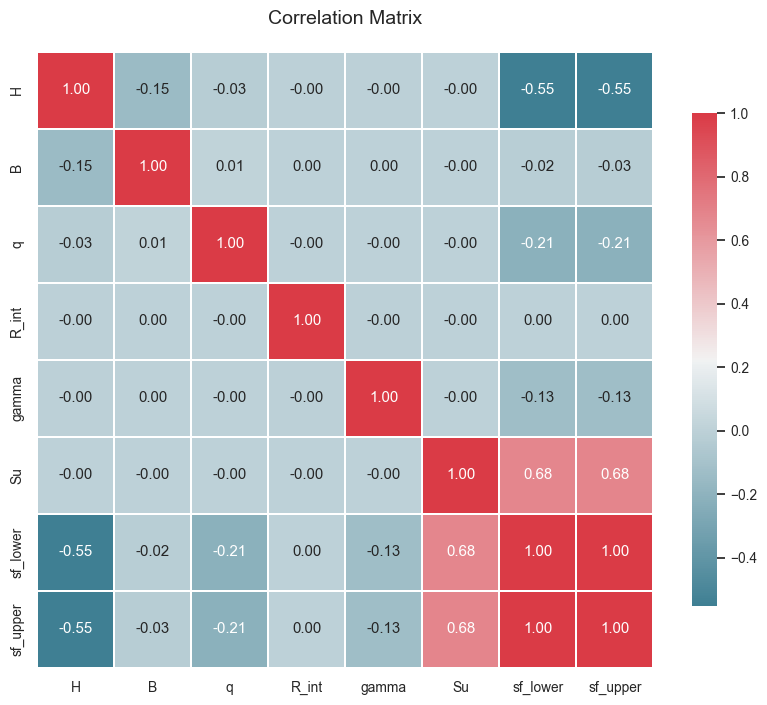

In [38]:
# Calculate the correlation matrix
correlation_matrix = csv_data.corr()

# Set a professional style for seaborn
sns.set(font_scale=0.9)
plt.figure(figsize=(10, 8))

# Define a custom color palette for the heatmap
custom_cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the correlation heatmap with customizations
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap=custom_cmap, 
            fmt=".2f",
            linewidths=0.01,
            square=True,
            cbar=True, 
            cbar_kws={"shrink": 0.8, "orientation": "vertical"},
            xticklabels=True, yticklabels=True)

# Add title
plt.title('Correlation Matrix', fontsize=14, pad=20)

# Show the plot
plt.show()

### 1.2.2 Statistical Analysis

In [59]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calculate basic descriptive statistics
summary_stats = csv_data.describe()

# Calculate the median (50th percentile)
median = csv_data.median()

# Calculate the mode (most frequent value) for each column
mode = csv_data.mode().iloc[0]

# Calculate the variance for each column
variance = csv_data.var()

# Calculate the standard deviation for each column
std_deviation = csv_data.std()

# Calculate the skewness for each column
skewness = csv_data.skew()

# Calculate the kurtosis for each column
kurtosis = csv_data.kurtosis()

# Combine the statistics into a summary DataFrame
summary_df = pd.DataFrame({
    'Mean': summary_stats.loc['mean'],
    'Median': median,
    'Mode': mode,
    'Variance': variance,
    'Std Deviation': std_deviation,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

# Display the summary statistics
print(summary_df.to_string())

               Mean  Median    Mode    Variance  Std Deviation  Skewness  Kurtosis
H          4.206089   4.000   2.000    3.312127       1.819925  0.206141 -1.044444
B         10.576112  10.000   2.000   34.666533       5.887829  0.069982 -1.271475
q          9.894614  10.000   0.000   66.401775       8.148728  0.019330 -1.493757
R_int      0.799766   0.800   0.600    0.026659       0.163275  0.002152 -1.499553
gamma     15.997658  16.000  14.000    2.665880       1.632752  0.002152 -1.499553
Su        62.500000  62.500  25.000  781.478770      27.954942  0.000000 -1.360234
sf_lower   5.506228   4.696   4.337   13.247471       3.639708  1.365566  1.985147
sf_upper   5.707246   4.872   4.968   14.144347       3.760897  1.363467  1.998214


In [55]:
# Calculate basic descriptive statistics
summary_stats = csv_data.describe()

# Calculate the median (50th percentile)
median = csv_data.median()

# Calculate the mode (most frequent value) for each column
mode = csv_data.mode().iloc[0]

# Calculate the variance for each column
variance = csv_data.var()

# Calculate the standard deviation for each column
std_deviation = csv_data.std()

# Calculate the skewness for each column
skewness = csv_data.skew()

# Calculate the kurtosis for each column
kurtosis = csv_data.kurtosis()

# Combine the statistics into a summary DataFrame
summary_df = pd.DataFrame({
    'Statistic': summary_stats.columns,
    'Mean': summary_stats.loc['mean'].map('{:.2f}'.format),
    'Median': median.map('{:.2f}'.format),
    'Mode': mode,
    'Variance': variance.map('{:.2f}'.format),
    'Std Deviation': std_deviation.map('{:.2f}'.format),
    'Skewness': skewness.map('{:.2f}'.format),
    'Kurtosis': kurtosis.map('{:.2f}'.format)
})

# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=list(summary_df.columns)),
    cells=dict(values=[summary_df[column] for column in summary_df.columns])
)])

# Customize the appearance of the table
fig.update_layout(
    title_text='Summarized Descriptive Statistics',
    title_x=0.5,
)

# Show the interactive table
fig.show()
